# Explore here

In [ ]:
import pandas as pd
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import warnings

In [104]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv'
pd.read_csv(url).to_csv('../data/raw/housing.csv', index=False)

In [105]:
df = pd.read_csv("../data/raw/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [106]:
df = df[["MedInc", "Latitude", "Longitude"]]
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


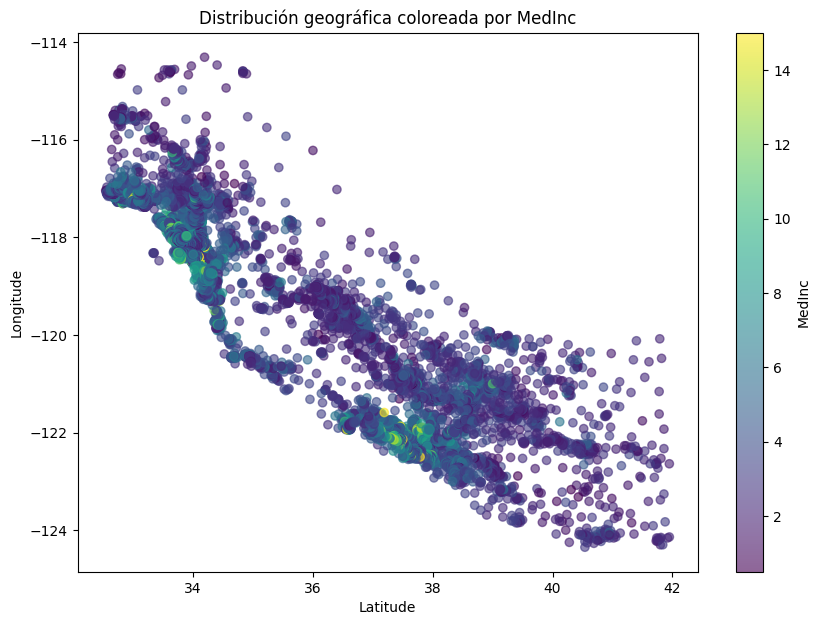

In [107]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df["Latitude"], df["Longitude"], 
                      c=df["MedInc"], cmap="viridis", alpha=0.6)

# Etiquetas y título
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Distribución geográfica coloreada por MedInc")

# Barra de color para interpretar MedInc
cbar = plt.colorbar(scatter)
cbar.set_label("MedInc")

plt.show()

In [108]:
train, test = train_test_split(df, test_size=0.1, random_state=42)

In [109]:
model = KMeans(n_clusters= 6, random_state=42)

model.fit(train)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [110]:
centroids = model.cluster_centers_
labels = model.labels_

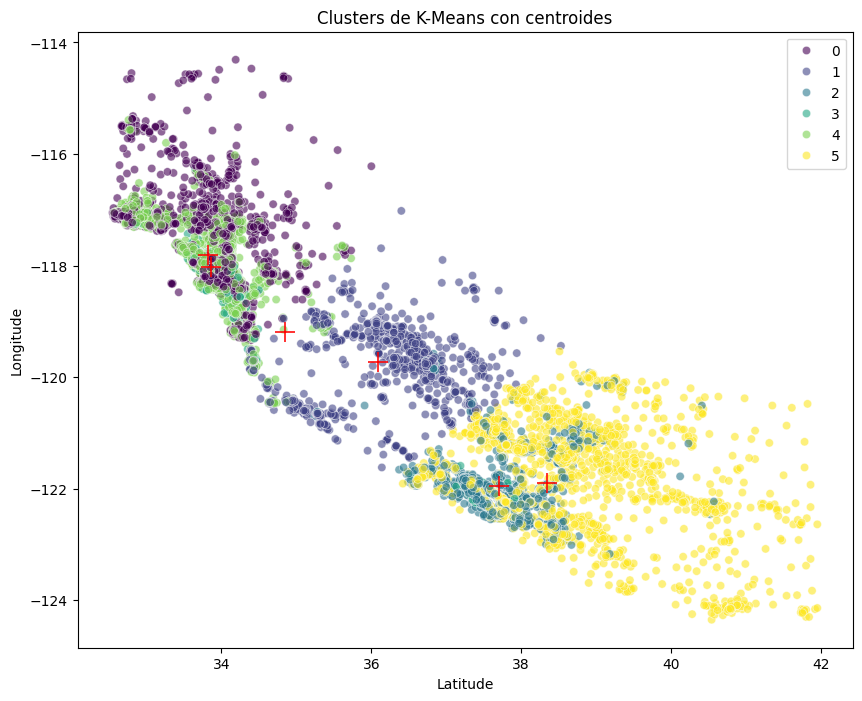

In [111]:
plt.figure(figsize=(10, 8))

# Scatter de los datos con etiquetas de cluster
sns.scatterplot(data=train, x="Latitude", y="Longitude", 
                hue=labels, palette="viridis", alpha=0.6)

# Scatter de los centroides
sns.scatterplot(x=centroids[:, 1], y=centroids[:, 2], 
                color="red", marker="+", s=200)

plt.title("Clusters de K-Means con centroides")
plt.show()

En el grafico anterior podemos observar los 6 clusters bastante mezclados entre si, aunque los centroides estan bien posicionadas al centro de cada cluster.

Se puede ver tambien que algunos clusters están mas concentrados en ciertas áreas, lo que podría indicar zonas urbanas densas, mientras que otros están más dispersos, posiblemente reflejando regiones rurales o menos pobladas

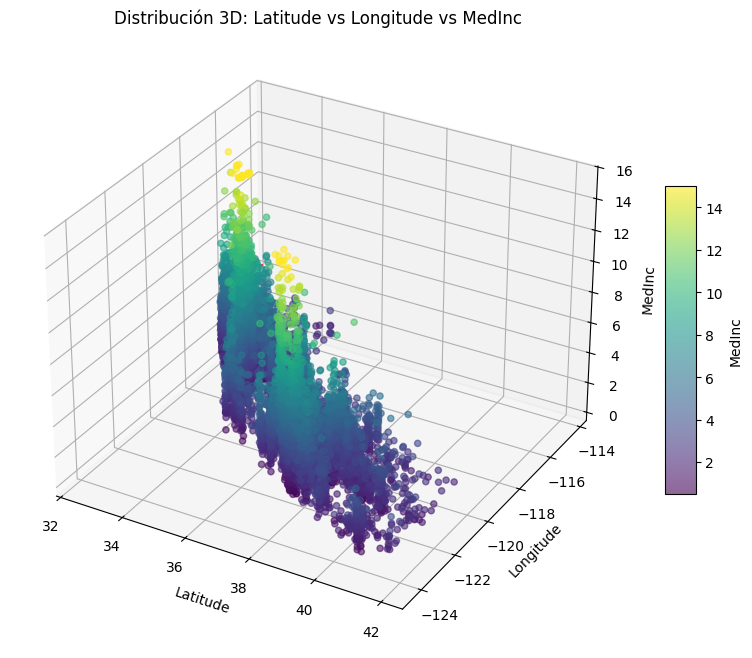

In [112]:

# Crear figura y eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter de datos
scatter = ax.scatter(train["Latitude"], train["Longitude"], train["MedInc"], 
                     c=train["MedInc"], cmap="viridis", alpha=0.6)

# Etiquetas
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("MedInc")
ax.set_title("Distribución 3D: Latitude vs Longitude vs MedInc")
ax.scatter(centroids[:, 1], centroids[:, 2], centroids[:, 0], 
           color="red", marker="+", s=200)


# Barra de color para interpretar MedInc
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("MedInc")

plt.show()

In [113]:

train["Cluster"] = model.labels_

# Predecir clusters en test
test_clusters = model.predict(test)
test["Cluster"] = test_clusters

# Asignar clusters al DataFrame original
df["cluster"] = pd.NA
df.loc[train.index, "cluster"] = train["Cluster"]
df.loc[test.index, "cluster"] = test["Cluster"]
df["cluster"] = df["cluster"].astype("category")


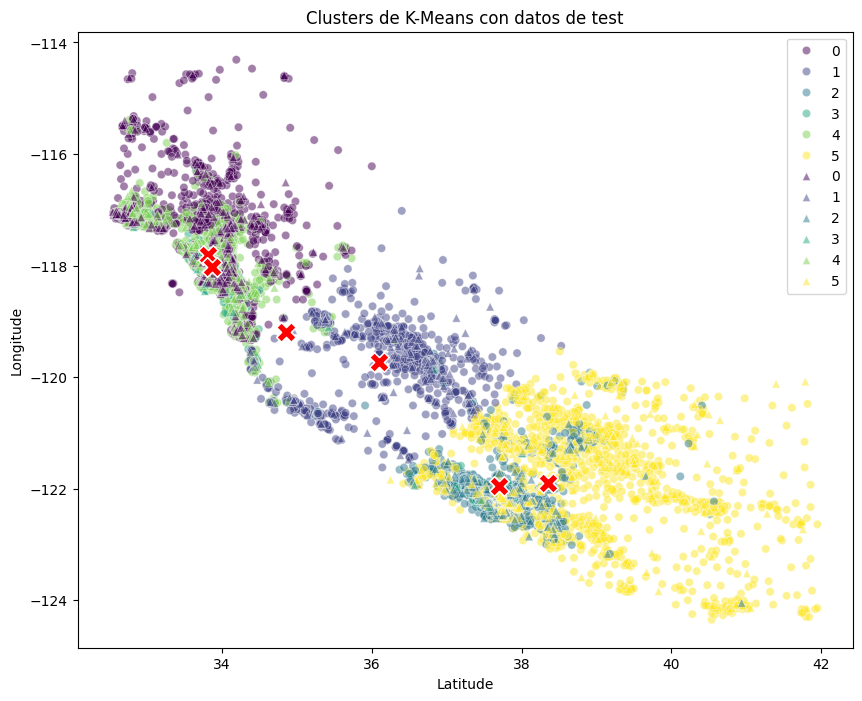

In [114]:
plt.figure(figsize=(10, 8))

# Conjunto de entrenamiento
sns.scatterplot(data=train, x="Latitude", y="Longitude",
                hue="Cluster", palette="viridis", alpha=0.5, marker="o")

# Conjunto de prueba
sns.scatterplot(data=test, x="Latitude", y="Longitude",
                hue="Cluster", palette="viridis", alpha=0.5, marker="^")

# Centroides
centroids = model.cluster_centers_
sns.scatterplot(x=centroids[:, 1], y=centroids[:, 2],
                color="red", marker="X", s=200)

plt.title("Clusters de K-Means con datos de test")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


In [115]:
features = ["MedInc", "Latitude", "Longitude"]
target = "Cluster"

X_train_clf = train[features]
y_train_clf = train[target]

X_test_clf = test[features]
y_test_clf = test[target]

In [116]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [117]:
y_pred = clf.predict(X_test_clf)

print("Matriz de confusión:")
print(confusion_matrix(y_test_clf, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test_clf, y_pred))


Matriz de confusión:
[[692   0   0   0   0   0]
 [  0 157   0   0   0   0]
 [  0   0 247   0   0   2]
 [  0   0   1  64   1   0]
 [  0   1   0   1 411   0]
 [  0   0   3   0   0 484]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       692
           1       0.99      1.00      1.00       157
           2       0.98      0.99      0.99       249
           3       0.98      0.97      0.98        66
           4       1.00      1.00      1.00       413
           5       1.00      0.99      0.99       487

    accuracy                           1.00      2064
   macro avg       0.99      0.99      0.99      2064
weighted avg       1.00      1.00      1.00      2064



In [118]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train_clf, y_train_clf)

y_pred_knn = knn.predict(X_test_clf)

# evaluacionn
print("Matriz de confusión (KNN):")
print(confusion_matrix(y_test_clf, y_pred_knn))

print("\nReporte de clasificación (KNN):")
print(classification_report(y_test_clf, y_pred_knn))

Matriz de confusión (KNN):
[[691   0   0   0   1   0]
 [  0 156   0   0   0   1]
 [  0   1 243   0   0   5]
 [  0   0   0  64   2   0]
 [  4   1   0   1 407   0]
 [  0   0   2   0   0 485]]

Reporte de clasificación (KNN):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       692
           1       0.99      0.99      0.99       157
           2       0.99      0.98      0.98       249
           3       0.98      0.97      0.98        66
           4       0.99      0.99      0.99       413
           5       0.99      1.00      0.99       487

    accuracy                           0.99      2064
   macro avg       0.99      0.99      0.99      2064
weighted avg       0.99      0.99      0.99      2064



In [ ]:


models_path = os.path.join("..", "models")

# K-means
with open(os.path.join(models_path, "kmeans.pkl"), "wb") as f:
    pickle.dump(model, f)

# Random Forest
with open(os.path.join(models_path, "random_forest.pkl"), "wb") as f:
    pickle.dump(clf, f)

# G KNN
with open(os.path.join(models_path, "knn.pkl"), "wb") as f:
    pickle.dump(knn, f)